# The Gradient Descent algorithm

We will use our knowledge of python programming to build a set of _metaheuristic_ solvers. We will start with very simple examples and work our way up to the Gradient Descent algorithm. This algorithm is very widely used in data science, including in the field of deep learning.

A very gentle and readable introduction to this and other interesting algorithms can be found in the book "Essentials of Metaheuristics," available for free at: https://cs.gmu.edu/~sean/book/metaheuristics/

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

## Random Guessing

#### Try all values in order to find exact answer
In an earlier lecture, we wrote some code to **solve the equation** `250 = 5 * x`. Although it wasn't made explicit in that example, the variable `x` can only take on integer values. We found that setting `x` equal to 50 gets us the answer we need. In that scenario, we knew that there _was_ an exact answer.

```python
for guess in range(250):
    if 5 * guess == 250:
        print("x = ", guess)
        break
```

In [1]:
for guess in range(250):
    if 5 * guess == 250:
        print("x = ", guess)
        break

x =  50


#### Try random values, when there is no exact answer

Let's change the problem slightly: `251 = 5 * x`. Now there is no exact integer answer (as long as `x` is an integer). We have to estimate an answer with as low an error as possible.

When we were looking for the value which gets us the exact answer, we could end the search as soon as the correct value was found. This time, we are trying to minimize the error, therefore we have to remember the best error and the associated guess throughout the search.

_Note_ : We are introducing the concept of error functions and keeping track of best guesses in a loop. Otherwise there are better (and slightly more complicated) ways of solving this.

In [1]:
best_error = None
best_guess = None

for guess in range(251):
    result = 5 * guess
    error  = abs(251 - result)
    
    if best_guess is None or error < best_error:
      best_guess = guess
      best_error = error

best_guess, best_error

(50, 1)

**Add visulization code**

In [4]:
best_error = None
best_guess = None

guesses_errors = list() # store errors and guesses to visualize

for guess in range(251):
    result = 5 * guess
    error  = abs(251 - result)
    
    guesses_errors.append((guess, error)) # store errors and guesses to visualize
    
    if best_guess is None or error < best_error:
      best_guess = guess
      best_error = error

best_guess, best_error

(50, 1)

In [14]:
guesses_errors_df = pd.DataFrame(guesses_errors, columns=["guess", "error"])

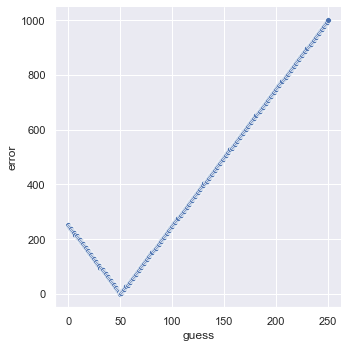

In [15]:
#plt.scatter([x[0] for x in guesses_errors], [x[1] for x in guesses_errors])
sns.relplot(x="guess", y="error", data=guesses_errors_df);


**Separate concerns**

Notice that the code for the equation `251 = 5 * x` is mixed in with the code which searches for the solution. Let's write it again and separate out the two concerns:

In [28]:
def eqn(x): return 5 * x

def guess(equation, target, guess_min, guess_max, return_intermediate_vals=False):
    best_error = None
    best_guess = None
    
    guesses_errors = list() # store errors and guesses to visualize

    for g in range(guess_min, guess_max):
        result = equation(g)
        error  = abs(target - result)
        
        guesses_errors.append((g, error)) # store errors and guesses to visualize
        
        if best_guess is None or error < best_error:
            best_guess = g
            best_error = error
    if return_intermediate_vals:
        return best_guess, best_error, guesses_errors
    else:
        return best_guess, best_error, None

In [29]:
guess(eqn, 251, 0, 251)

(50, 1, None)

In [30]:
guess(eqn, 250, 0, 251)

(50, 0, None)

In [31]:
guess(lambda x: x * 25, 250, 0, 251)

(10, 0, None)

Same result, but with a chart to show how we arrived at the guess

50 1


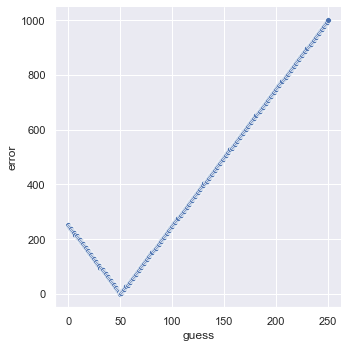

In [33]:
best_guess, best_error, guesses = guess(eqn, 251, 0, 251, return_intermediate_vals=True)

print(best_guess, best_error)
sns.relplot(x="guess", y="error", data=pd.DataFrame(guesses, columns=["guess", "error"]));

50 0


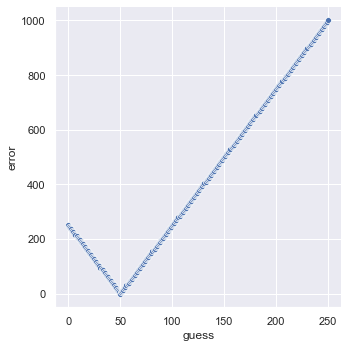

In [34]:
best_guess, best_error, guesses = guess(eqn, 250, 0, 251, return_intermediate_vals=True)

print(best_guess, best_error)
sns.relplot(x="guess", y="error", data=pd.DataFrame(guesses, columns=["guess", "error"]));

10 0


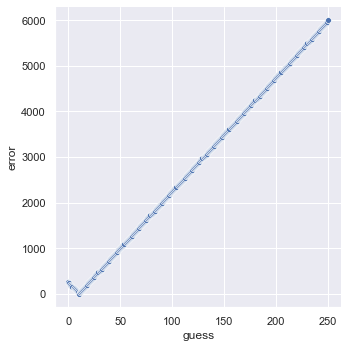

In [35]:
best_guess, best_error, guesses = guess(lambda x: x * 25, 250, 0, 251, return_intermediate_vals=True)

print(best_guess, best_error)
sns.relplot(x="guess", y="error", data=pd.DataFrame(guesses, columns=["guess", "error"]));

The basic idea is this: we will try random integers (within some range), we will remember the values which get us the best results and ignore the ones which get us results worse than what we already have.

_Side note_ : Randomness is not such a good strategy for a problem like this, but we are using it here to illustrate a coding pattern.

Very informal pseudo code:
```ruby
try a guess for x in equation 250 = 5 * x
if guess is better than the preivously recorded guess, store this guess
keep going until the error is small enough or the guessing game has run long enough
```

In [1]:
import random

In [9]:
num_of_guesses = 1000
min_guess = 0
max_guess = 1000

best_guess = None
best_error = None

for guess in [random.randint(min_guess, max_guess) for _ in range(num_of_guesses)]:
  result = 5 * guess
  error = abs(251 - result)

  if best_guess is None or error < best_error:
    best_guess = guess
    best_error = error

best_guess, best_error

(50, 1)

**Exercise** Do you understand what the expression `[random.randint(min_guess, max_guess) for _ in range(num_of_guesses)]` is doing? If not, please ask. How does the code change if we had to use loops instead of this list comprehension?

**Exercise** Do you understand what the expression `best_guess is None or error < best_error:` is doing? If `best_guess` is None, is the remaining expression `error < best_error` still evaluated?

**Exercise** Turn this into a function `random_search(num_of_guesses, min_guess, max_guess)`. This function should return a single number, our best guess for the expression `251 = 5 * x`.